In [9]:
import pandas as pd
import arcgis
from arcgis import *
from arcgis.features import GeoAccessor,GeoSeriesAccessor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from arcgis.mapping import WebMap
from IPython.display import display

In [10]:
df = pd.read_csv('data/kc_house_data.csv')



gis = GIS("http://www.arcgis.com/", "shadowsword_0","Acidblade1")

In [11]:
def gis_content():
#     item = gis.content.get('ff9e4774ee8641f48cccac97dca753db#data')
#     flayer = item.layers[0]
#     food = flayer.query(where = "ESITE = '0000000'").sdf.copy()
    item = gis.content.get('3f263039314d44cc93384fe1f4229796#data')
    flayer = item.layers[0]
    public = flayer.query(where = "ZIPCODE > 0").sdf.copy()
    
    item = gis.content.get('0dfe37d2a68545a699b999804354dacf')
    flayer = item.layers[0]
    private = flayer.query(where = "STATE = 'WA'").sdf.copy()
    
    #Editing data for later use
    public_df = public.drop(['FID','PIN','SCH_CLASS','CODE','FEATURE_ID','ESITE','MAJOR','MINOR','SHAPE'],1)
    private_df = private.drop(['FID','NCESID','ZIP4','VAL_METHOD','VAL_DATE','SHELTER_ID','COUNTRY','SOURCE','SOURCEDATE','NAICS_CODE','FT_TEACHER','START_GRAD','END_GRADE','COUNTYFIPS','SHAPE','TYPE','STATUS','VAL_METHOD','VAL_DATE'],1)
#     food_df = food.drop(['RECORD_ID','FACILITY_NAME','CHAIN_NAME','CHAIN_ESTABLISHMENT','SITE_ADDRESS','ABB_NAME','ESITE','FEATURE_ID'],1)
    private_df = private_df.rename(columns ={'ZIP':'zipcode','LONGITUDE':'long','LATITUDE':'lat'})
    public_df = public_df.rename(columns = {'LONG_CEN': 'long', 'LAT_CEN': 'lat','ZIPCODE':'zipcode'})
    private_df['Private'] = 'yes'
    public_df['Private'] = 'No'
    public_df['zipcode'] = public_df['zipcode'].astype(str).astype(int)
    private_df['zipcode'] = private_df['zipcode'].astype(str).astype(int)
    public_df['Private'].astype(str)
    
    return (public_df,private_df) 


In [12]:
public,private = gis_content()

In [13]:

def mapping(df):
    """Taking in a dataframe to assign the budget through all fields. Takes schools into account as well. If not looking for schools
        just enter through"""
#     mapp = gis.content.get('579a5ea9a24d4b85b237ef8e9cb578b4')
    budget = int(input('What is your budget: '))
    budget_df = df.loc[df.price<=budget].copy()
    budget_df.is_copy = None
    pdx_map = gis.map('Seattle WA')
    pdx_map.basemap = 'streets-night-vector'
    schools = input('Are you interested in schools? ')
    if (schools == 'Yes') or (schools == 'yes') and (budget is not None):
        interest = input('Private school,Public school or both? ')
        if (interest =='Private') or (interest =='private'):
            
            
            school_sdf = pd.DataFrame.spatial.from_xy(private,'long','lat')
            school_sdf.spatial.plot(map_widget = pdx_map,renderer_type = "c",symbol_type = 'simple',symbol_style = 'o',title = 'Schools', 
                    col='zipcode',
                    cmap='winter',  # matplotlib color map
                    alpha=0.7,
                    size = .5, 
                    outline_color=[0,0,0,0])
        elif(interest =='Public') or (interest == 'public'):
#           
            school_sdf = pd.DataFrame.spatial.from_xy(public,'long','lat')
            school_sdf.spatial.plot(map_widget = pdx_map, renderer_type = "c",symbol_type = 'simple',symbol_style = 'o',title = 'Public', 
                    col='zipcode',
                    cmap='winter',  # matplotlib color map
                    alpha=0.7,
                    size = .5, 
                    outline_color=[0,0,0,0])
        else:
            school_sdf = pd.DataFrame.spatial.from_xy(all_schools,'LONGITUDE','LATITUDE')
            school_sdf.spatial.plot(map_widget = pdx_map,renderer_type = "c",symbol_type = 'simple',symbol_style = 'o',title = 'Schools', 
                      col='zipcode',
                      cmap='winter',  # matplotlib color map
                    alpha=0.7,
                    size = .5, 
                    outline_color=[0,0,0,0])
        
       
    data_sdf = pd.DataFrame.spatial.from_xy(budget_df, 'long','lat')
    
       
    data_sdf.spatial.plot(map_widget=pdx_map, renderer_type = "c",marker_size = 5
                    ,symbol_type = 'simple',symbol_style='d',
                    title='Pricing of houses',
                    col='price',
                    cmap='spring',  # matplotlib color map
                    alpha=0.7,
                    size = .5,
                    outline_color=[0,0,0,0]
                     )
#     food_sdf = pd.DataFrame.spatial(food)
#     food_sdf.plot(map_widget = pdx_map,renderer_type = "c",symbol_type = 'simple', symbol_style = 'x',
#                   title='Pricing of houses',
#                     col='price',  
#                   cmap='spring',  # matplotlib color map
#                     alpha=0.7,
#                     size = .5,
#                     outline_color=[0,0,0,0])
    pdx_map.legend = True
    display(pdx_map)
#     display(mapp)
# took legend out since the unique renderer_type makes it hard to assign general information through it. 
# Will work on getting that working so the distance from houses shows schools locally by zipcode.
# sns.barplot(x = 'price',y = 'sqft_living',data = budget_df)

In [14]:
mapping(df)

What is your budget:  150000
Are you interested in schools?  yes
Private school,Public school or both?  private


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [7]:
private.head()

,NAME,ADDRESS,CITY,STATE,zipcode,TELEPHONE,POPULATION,COUNTY,lat,long,NAICS_DESC,WEBSITE,LEVEL_,ENROLLMENT,Private
0,HOLY FAMILY ELEMENTARY SCHOOL,1002 CHESTNUT ST,CLARKSTON,WA,99403,(509) 758-6621,97,ASOTIN,46.411282,-117.051147,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,89,yes
1,BETHLEHEM LUTHERAN SCHOOL,2505 W 27TH AVE,KENNEWICK,WA,99337,(509) 582-5624,185,BENTON,46.195222,-119.126914,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,174,yes
2,CHILDREN'S GARDEN MONTESSORI,2440 GARLICK BLVD,RICHLAND,WA,99354,(509) 375-1638,45,BENTON,46.319501,-119.279506,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,42,yes
3,LIBERTY CHRISTIAN SCHOOL,2200 WILLIAMS BLVD,RICHLAND,WA,99354,(509) 946-0602,392,BENTON,46.285753,-119.300263,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,3,362,yes
4,CHILDRENS GATE MONTESSORI SCHOOL,1425 CHERRY ST,WENATCHEE,WA,98801,(509) 886-0533,8,CHELAN,47.415093,-120.336569,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,5,yes


In [16]:
public.head()




,NAME,ABB_NAME,ADDRESS,zipcode,long,lat,DISTRICT,WEBSITE,Private,SHAPE
0,Glacier Park School,Glacier Park,23700 SE 280th St,98038,-122.025583,47.351607,TAHOMA,http://www.tahoma.wednet.edu/SubSite/GPES/inde...,No,"{""spatialReference"": {""wkid"": 4326}, ""x"": -122..."
1,Rosa Parks School,Rosa Parks,22845 NE Cedar Park Crescent,98053,-122.034854,47.684738,LAKE WASHINGTON,http://publicportal.lwsd.org/schools/rosaparks...,No,"{""spatialReference"": {""wkid"": 4326}, ""x"": -122..."
2,Evergreen School,Evergreen,15201 Meridian Ave N,98133,-122.335278,47.738587,SHORELINE,http://www.evergreenschool.org/about-evergreen...,No,"{""spatialReference"": {""wkid"": 4326}, ""x"": -122..."
3,Seahawks Academy 6-8,Seahawks Academy 6-8,1600 S Columbian Way,98108,-122.312085,47.564131,SEATTLE,none,No,"{""spatialReference"": {""wkid"": 4326}, ""x"": -122..."
4,Family Learning Center,Family Learning Center,2315 173rd Ave NE,98052,-122.109820,47.630440,LAKE WASHINGTON,http://washington.schooltree.org/public/Family...,No,"{""spatialReference"": {""wkid"": 4326}, ""x"": -122..."


In [ ]:
# pull data from https://blue.kingcounty.com/Assessor/eRealProperty/Detail.aspx?ParcelNbr=
# adding the id number from each of the dataframes into the last bit of the code adding that to a new dataframe to work with the code

<Item title:"baseMap for project" type:Web Map owner:shadowsword_0>
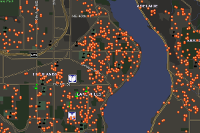

In [8]:
item = gis.content.get('579a5ea9a24d4b85b237ef8e9cb578b4')
item






# online_map = WebMap(test_map)

In [33]:
online_map

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']